### Load libraries

In [1]:
from parameters import parameters as par
from model import Model
from modules.loader import Loader
from simulator import Simulator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pickle

### Select dates and education level
- All solutions are stored in 'Pickled_Solutions' folder

In [2]:
date = '18-05'
educ = 'College'

### Load solution

In [3]:
V_sol, C_sol, par_ = Loader.load('Pickled_Solutions/Run_' + educ + '/' + date)

### Run simulation

In [4]:
NUMBER_OF_PERSONS = 1000
states, choices, shocks = Simulator.simulate(V_sol, C_sol, par_, NUMBER_OF_PERSONS)

## State plots

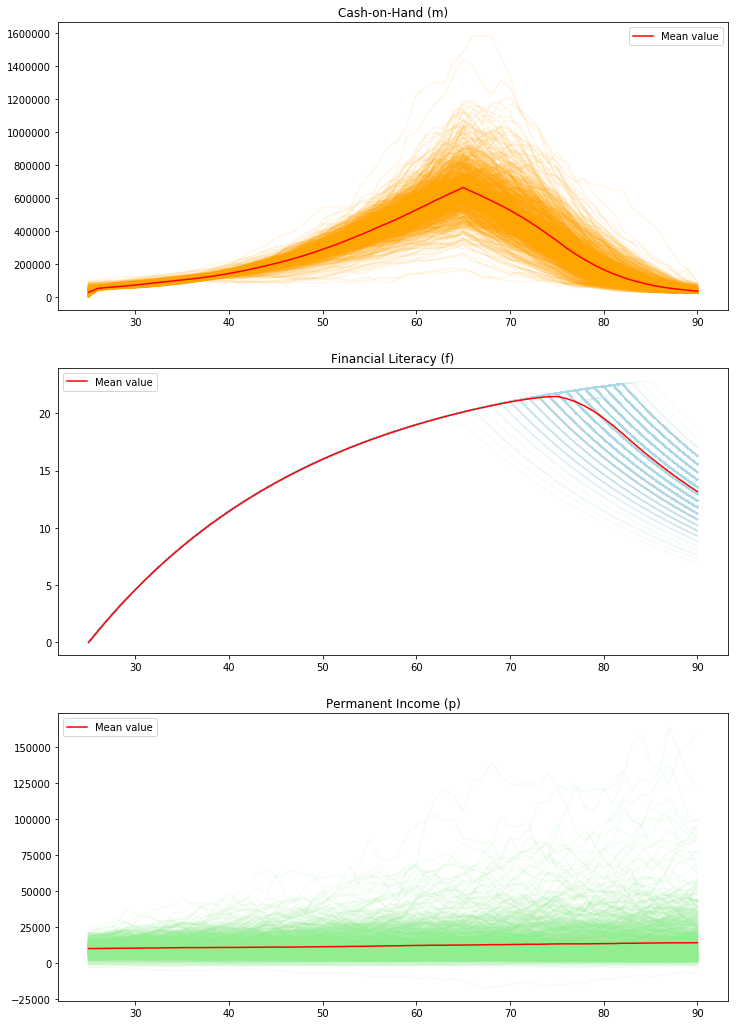

In [5]:
FIGSIZE = (12, 18)
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=FIGSIZE)
ax1.set_title("Cash-on-Hand (m)")
ax1.plot(range(25, 91), states[0,:], alpha=0.1, color='orange')
ax1.plot(range(25, 91), states[0,:].mean(axis=1), color='red', label = 'Mean value')
ax1.legend()

ax2.set_title("Financial Literacy (f)")
ax2.plot(range(25, 91), states[1,:], alpha=0.1, color='lightblue')
ax2.plot(range(25, 91), states[1,:].mean(axis=1), color='red', label = 'Mean value')
ax2.legend()

ax3.set_title("Permanent Income (p)")
ax3.plot(range(25, 91), states[2,:], alpha=0.1, color='lightgreen')
ax3.plot(range(25, 91), states[2,:].mean(axis=1), color='red', label = 'Mean value')
ax3.legend()


plt.show()


## Choice plots

In [6]:
college_mean = states[0, 40, :].mean() # mean of cash on hand at age 65

In [7]:
college_std = states[0, 40, :].std() # std of cash on hand at age 65
college_std

150649.24185711108

In [8]:
college_median = np.median(states[0, 40, :])

### High School

In [9]:
date = '18-05'
educ = 'HS'

In [10]:
V_sol, C_sol, par_ = Loader.load('Pickled_Solutions/Run_' + educ + '/' + date)

In [11]:
NUMBER_OF_PERSONS = 1000
states, choices, shocks = Simulator.simulate(V_sol, C_sol, par_, NUMBER_OF_PERSONS)

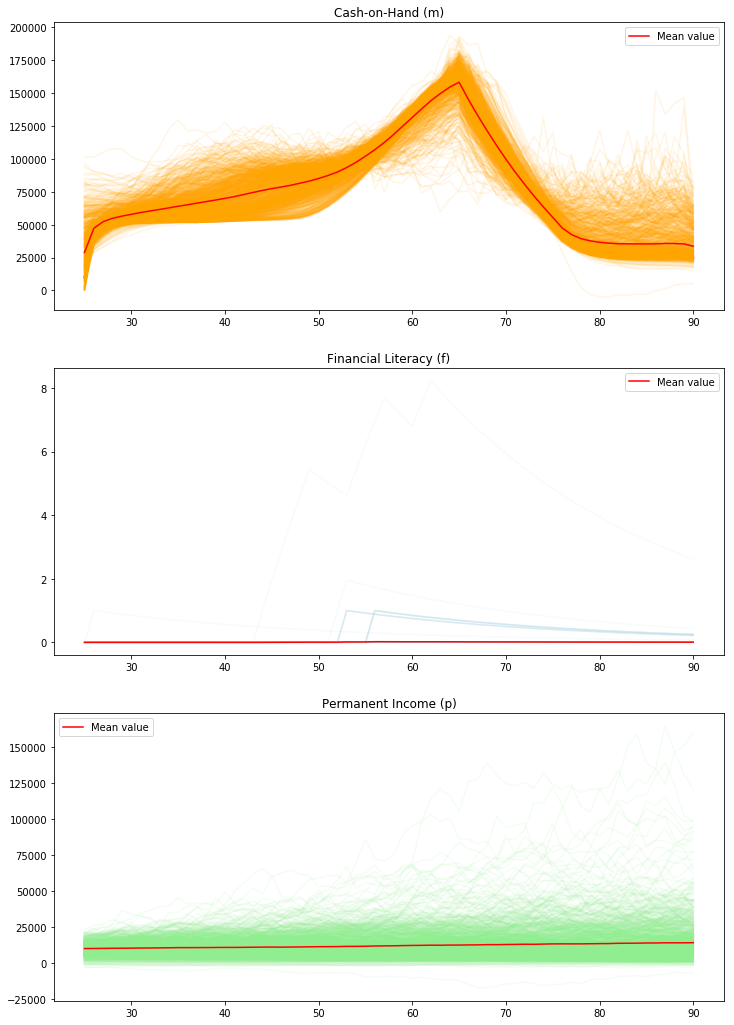

In [12]:
FIGSIZE = (12, 18)
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=FIGSIZE)
ax1.set_title("Cash-on-Hand (m)")
ax1.plot(range(25, 91), states[0,:], alpha=0.1, color='orange')
ax1.plot(range(25, 91), states[0,:].mean(axis=1), color='red', label = 'Mean value')
ax1.legend()

ax2.set_title("Financial Literacy (f)")
ax2.plot(range(25, 91), states[1,:], alpha=0.1, color='lightblue')
ax2.plot(range(25, 91), states[1,:].mean(axis=1), color='red', label = 'Mean value')
ax2.legend()

ax3.set_title("Permanent Income (p)")
ax3.plot(range(25, 91), states[2,:], alpha=0.1, color='lightgreen')
ax3.plot(range(25, 91), states[2,:].mean(axis=1), color='red', label = 'Mean value')
ax3.legend()


plt.show()


In [13]:
hs_mean = states[0, 40, :].mean() # mean of cash on hand at age 65
hs_mean

158200.82576021907

In [14]:
hs_std = states[0, 40, :].std() # std of cash on hand at age 65
hs_std

13369.789375264752

In [15]:
hs_median = np.median(states[0, 40, :])

### Sub highschool

In [16]:
date = '18-05'
educ = '<HS'

In [17]:
V_sol, C_sol, par_ = Loader.load('Pickled_Solutions/Run_' + educ + '/' + date)

In [18]:
NUMBER_OF_PERSONS = 1000
states, choices, shocks = Simulator.simulate(V_sol, C_sol, par_, NUMBER_OF_PERSONS)

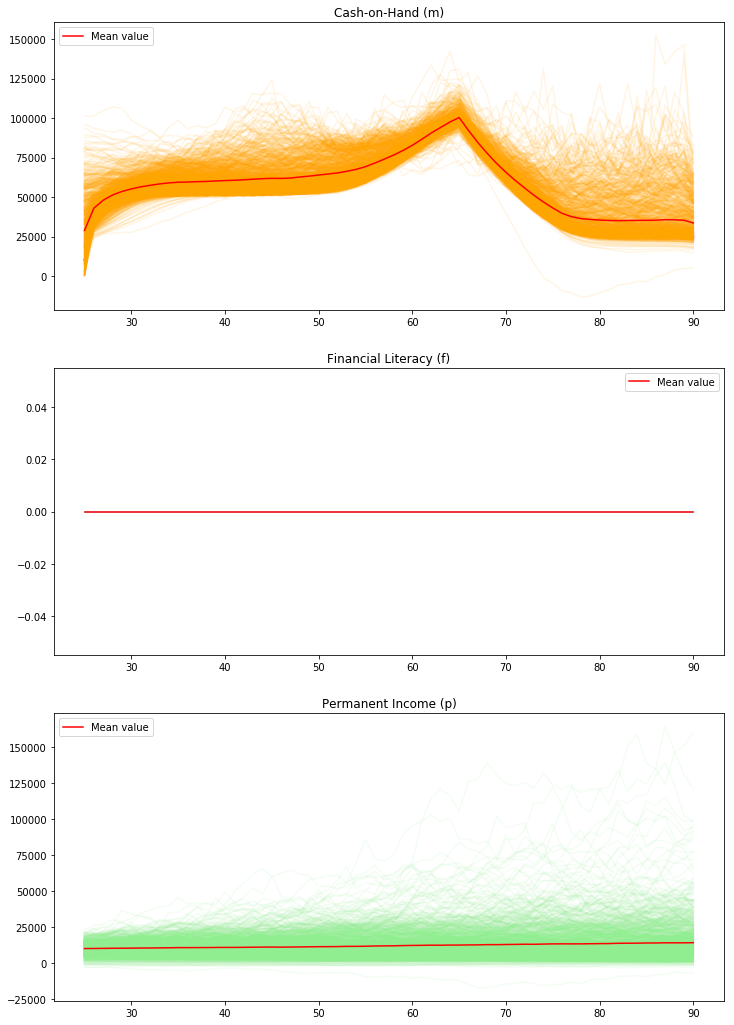

In [19]:
FIGSIZE = (12, 18)
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=FIGSIZE)
ax1.set_title("Cash-on-Hand (m)")
ax1.plot(range(25, 91), states[0,:], alpha=0.1, color='orange')
ax1.plot(range(25, 91), states[0,:].mean(axis=1), color='red', label = 'Mean value')
ax1.legend()

ax2.set_title("Financial Literacy (f)")
ax2.plot(range(25, 91), states[1,:], alpha=0.1, color='lightblue')
ax2.plot(range(25, 91), states[1,:].mean(axis=1), color='red', label = 'Mean value')
ax2.legend()

ax3.set_title("Permanent Income (p)")
ax3.plot(range(25, 91), states[2,:], alpha=0.1, color='lightgreen')
ax3.plot(range(25, 91), states[2,:].mean(axis=1), color='red', label = 'Mean value')
ax3.legend()


plt.show()


In [20]:
sub_hs_mean = states[0, 40, :].mean() # mean of cash on hand at age 65
sub_hs_mean

100385.33568124562

In [21]:
sub_hs_std = states[0, 40, :].std() # std of cash on hand at age 65
sub_hs_std

5151.226910700149

In [22]:
sub_hs_median = np.median(states[0, 40, :])

### Wealth Inequality Table

In [24]:
data = {
    'education': ['college', 'high school', '< high school'],
    'mean' : [college_mean, hs_mean, sub_hs_mean],
    'median': [college_median, hs_median, sub_hs_median],
    'mean - 2 std' : [college_mean - 2*college_std, hs_mean - 2*hs_std, sub_hs_mean - 2*sub_hs_std],
    'mean + 2 std' : [college_mean + 2*college_std, hs_mean + 2*hs_std, sub_hs_mean + 2*sub_hs_std]
}



In [25]:
pd.DataFrame(data).round(1)

,education,mean,median,mean - 2 std,mean + 2 std
0,college,664381.0,656016.3,363082.5,965679.5
1,high school,158200.8,159283.4,131461.2,184940.4
2,< high school,100385.3,99525.6,90082.9,110687.8
